In [221]:
# Import the libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [222]:
# Import the data
# put 'r' before the path string to address any special characters in the path, such as '\'
office = pd.read_csv(r'E:\the_office_series.csv')

# first take some information from the data 
office.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   EpisodeNumber  188 non-null    int64  
 1   Season         188 non-null    int64  
 2   EpisodeTitle   188 non-null    object 
 3   About          188 non-null    object 
 4   Ratings        188 non-null    float64
 5   Votes          188 non-null    int64  
 6   Viewership     188 non-null    float64
 7   Duration       188 non-null    int64  
 8   Date           188 non-null    object 
 9   GuestStars     29 non-null     object 
 10  Director       188 non-null    object 
 11  Writers        188 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 17.8+ KB


## lets analyze the viewership based on the epidoes

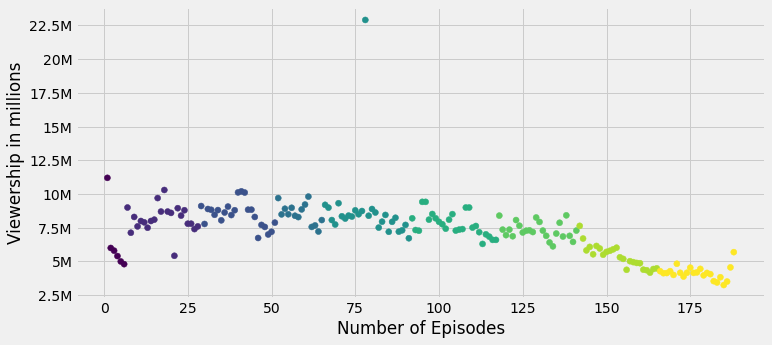

,Season,EpisodeTitle,Ratings,Votes,Viewership
77,5,Stress Relief,9.7,8170,22.91


In [223]:
# define the plotting area
plt.figure(figsize=(11, 5))

# make the scatrer plot
plt.scatter('EpisodeNumber','Viewership', data = office, c = 'Season')

# labelling of figure
plt.xlabel('Number of Episodes')
plt.ylabel('Viewership in millions')
plt.yticks([2.5, 5, 7.5, 10, 12.5, 15, 17.5, 20, 22.5],
           ['2.5M', '5M', '7.5M', '10M' , '12.5M' , '15M' , '17.5M' , '20M' , '22.5M'])

# show the figure
plt.show()

# Pick the row have maximum viewership to see the exact figure of Viewship and other details
max_viewership = office[office['Viewership'] == max(office['Viewership'])]
max_viewership[['Season', 'EpisodeTitle', 'Ratings', 'Votes', 'Viewership']]

## find the top 15 voted episodes

c:\users\mairaj-pc\appdata\local\programs\python\python36\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


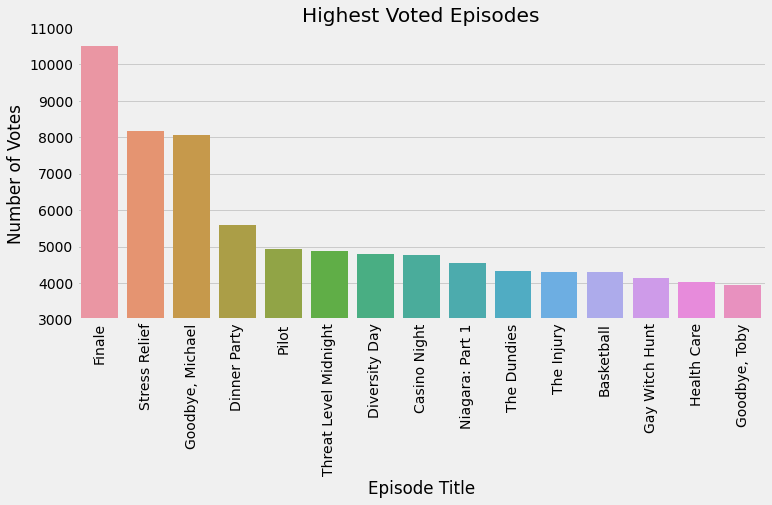

,Season,EpisodeTitle,Ratings,Votes,Viewership
187,9,Finale,9.8,10515,5.69


In [224]:
# define the top 15 votes taken by episode
top_15_voted = (office.sort_values(by = ['Votes','Ratings'],ascending=False)).iloc[:15,:]

# define the plotting area
plt.figure(figsize=(11, 5))

# make the bar plot
plot = sns.barplot('EpisodeTitle', 'Votes', data = top_15_voted)

# adjust the axes
plot.set(ylim=(3000, 11000))
plot.set_xticklabels(plot.get_xticklabels(), rotation = 90)

# labelling of figure
plt.xlabel("Episode Title")
plt.ylabel("Number of Votes")
plt.title("Highest Voted Episodes")

# show the figure
plt.show()

# Pick the row have maximum votes to see the exact figure of Votes and other details
max_votes = office[office['Votes'] == max(office['Votes'])]
max_votes[['Season', 'EpisodeTitle', 'Ratings', 'Votes', 'Viewership']]

In [225]:
office.set_index(keys=['Season'], drop=False,inplace=True)

# get a list of names
names= office['Season'].unique().tolist()

# now we can perform a lookup on a 'view' of the dataframe
seasons = []

for x in range(1,10):
   seasons.append(office.loc[office.Season == x])

print(seasons)

[        EpisodeNumber  Season   EpisodeTitle  \
Season                                         
1                   1       1          Pilot   
1                   2       1  Diversity Day   
1                   3       1    Health Care   
1                   4       1   The Alliance   
1                   5       1     Basketball   
1                   6       1       Hot Girl   

                                                    About  Ratings  Votes  \
Season                                                                      
1       The premiere episode introduces the boss and s...      7.5   4936   
1       Michael's off color remark puts a sensitivity ...      8.3   4801   
1       Michael leaves Dwight in charge of picking the...      7.8   4024   
1       Just for a laugh, Jim agrees to an alliance wi...      8.1   3915   
1       Michael and his staff challenge the warehouse ...      8.4   4294   
1       Michael is just one of the many male staff who...      7.7   3854  

In [226]:
avg_list = []

# We create a function avg_rating that takes in the season number and gives the average rating of that season

def avg_rating (season):
    return (seasons[season]["Ratings"].mean())
for x in range(0,9):
    avg_list.append(avg_rating(x))
    
print(avg_list)

[7.966666666666668, 8.440909090909091, 8.58695652173913, 8.564285714285713, 8.488461538461538, 8.196153846153846, 8.308333333333334, 7.604166666666667, 7.913043478260869]


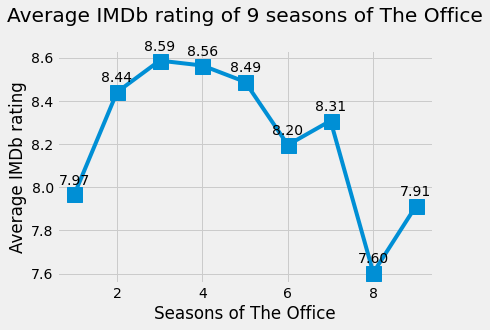

In [227]:
# lets plot the finding:

# first deifne the labelling
x = office["Season"].unique()
plt.style.use("fivethirtyeight")
plt.plot(x, avg_list, marker = "s", markersize=15)
plt.xlabel("Seasons of The Office")
plt.ylabel("Average IMDb rating")
plt.title("Average IMDb rating of 9 seasons of The Office\n ")

# Now apply the number to the ratings by using plt.annotate()
for x,y in zip(x,avg_list):
    
    label = "{:.2f}".format(y)
    
    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords ="offset points", # how to position the text
                 xytext = (0,10), # distance from text to points (x,y)
                 ha = 'center')
plt.show()

## Now let us see which episodes ranked the highest and why ?

In [228]:
# The highest rating
highest_rating = max(office["Ratings"])

# Filter the Dataframe row that has the highest rated episode
highest_rated_dataframe = office.loc[office["Ratings"] == highest_rating]
highest_rated_dataframe

,EpisodeNumber,Season,EpisodeTitle,About,Ratings,Votes,Viewership,Duration,Date,GuestStars,Director,Writers
Season,,,,,,,,,,,,
7,138,7,"Goodbye, Michael",As the office gets ready for Michael's final d...,9.8,8059,8.42,50,28 April 2011,NaN,Paul Feig,Greg Daniels
9,188,9,Finale,"One year later, Dunder Mifflin employees past ...",9.8,10515,5.69,51,16 May 2013,"Joan Cusack, Ed Begley Jr, Rachel Harris, Nanc...",Ken Kwapis,Greg Daniels


## find the rating of top 10 directors

In [229]:
directors = office["Director"].value_counts().keys()

# lets analyze their ratings by finding average rating
directors_rating = office.groupby('Director')['Ratings'].mean().reset_index()

# Now pick the top ten rated directors and plot their ratings
top_10_directors = directors_rating.sort_values('Ratings', ascending = False).head(10)
top_10_directors

,Director,Ratings
20,Harold Ramis,8.825000
22,Jason Reitman,8.800000
50,Steve Carell,8.766667
40,Paul Feig,8.753333
29,Joss Whedon,8.700000
18,Gene Stupnitsky,8.700000
52,Tucker Gates,8.650000
32,Ken Kwapis,8.607692
30,Julian Farino,8.600000
34,Lee Eisenberg,8.600000


c:\users\mairaj-pc\appdata\local\programs\python\python36\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, "Directors and their episodes' ratings")

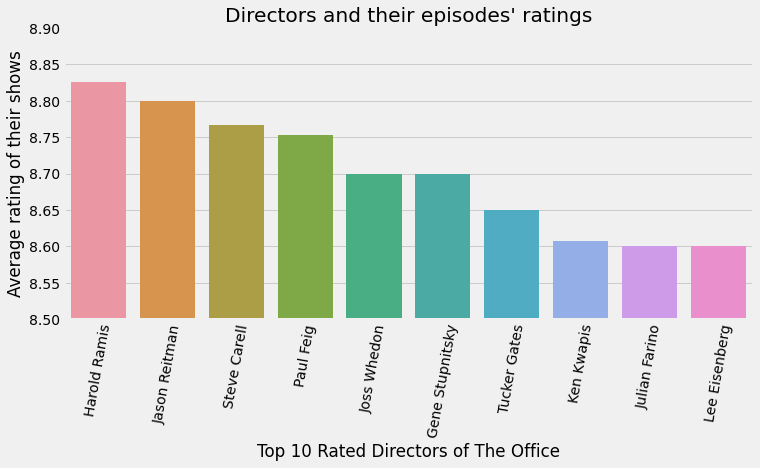

In [230]:
# lets plot the rting of top 10 directors
plt.figure(figsize=(11, 5))
plot = sns.barplot('Director', 'Ratings', data = top_10_directors)
plot.set(ylim=(8.5,8.9))
plot.set_xticklabels(plot.get_xticklabels(), rotation=80)
plt.xlabel("Top 10 Rated Directors of The Office")
plt.ylabel("Average rating of their shows")
plt.title("Directors and their episodes' ratings")